In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm


In [23]:
train_dataset_raw = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset_raw = torchvision.datasets.MNIST(root='./data', train=False, download=True)

# Extract data and targets into NumPy arrays
X_train_raw = train_dataset_raw.data.numpy()
y_train_raw = train_dataset_raw.targets.numpy()

X_test_raw = test_dataset_raw.data.numpy()
y_test = test_dataset_raw.targets.numpy()

print(f"Training data shape: {X_train_raw.shape}")
print(f"Test data shape: {X_test_raw.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [15]:
# Reshape the 28x28 images into 784-dimensional vectors
n_train_samples = X_train_raw.shape[0]
n_test_samples = X_test_raw.shape[0]

X_train_flat = X_train_raw.reshape(n_train_samples, -1)
X_test_flat = X_test_raw.reshape(n_test_samples, -1)

print(f"Flattened training data shape: {X_train_flat.shape}")
print(f"Flattened test data shape: {X_test_flat.shape}")

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [16]:
# For faster training use a random subset of the training data
np.random.seed(42)
subset_size = 15000
subset_indices = np.random.choice(n_train_samples, subset_size, replace=False)

X_train_sub = X_train_flat[subset_indices]
y_train_sub = y_train_raw[subset_indices]

print(f"Using a subset of {subset_size} samples for training.")

Using a subset of 15000 samples for training.


In [17]:
# Initialize the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_sub.astype(np.float64))
X_test_scaled = scaler.transform(X_test_flat.astype(np.float64))
print("Scaling complete.")

Scaling complete.


In [18]:
# Initialize the SVM classifier
native_svm = SVC(kernel='rbf', C=1, gamma='scale', verbose=True)

start_time = time.time()
native_svm.fit(X_train_scaled, y_train_sub)
end_time = time.time()

svm_native_training_time = end_time - start_time
print(f"\n SVM training finished in {svm_native_training_time:.2f} seconds.")

[LibSVM]
 SVM training finished in 39.90 seconds.


In [20]:
y_pred_svm_native = native_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm_native)
print(f"\nSVM Test Accuracy: {accuracy * 100:.2f}%")


SVM Test Accuracy: 94.78%


     Native SVM Performance Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.94      0.95      0.95      1010
           4       0.96      0.95      0.95       982
           5       0.95      0.92      0.94       892
           6       0.95      0.96      0.95       958
           7       0.89      0.95      0.92      1028
           8       0.95      0.93      0.94       974
           9       0.95      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



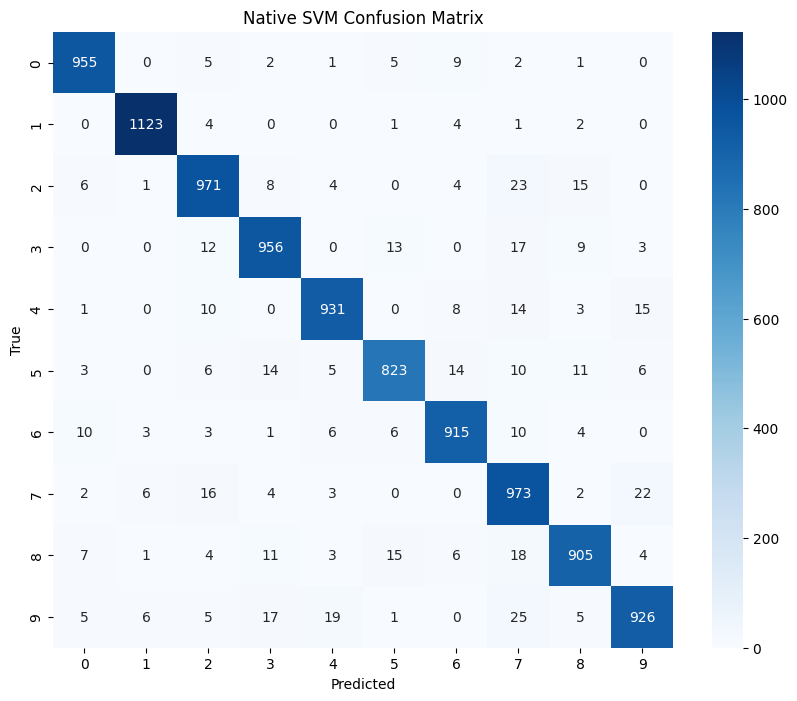

In [21]:
# print the classification report
print("     Native SVM Performance Report")
print(classification_report(y_test, y_pred_svm_native))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm_native)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Native SVM Confusion Matrix")
plt.show()

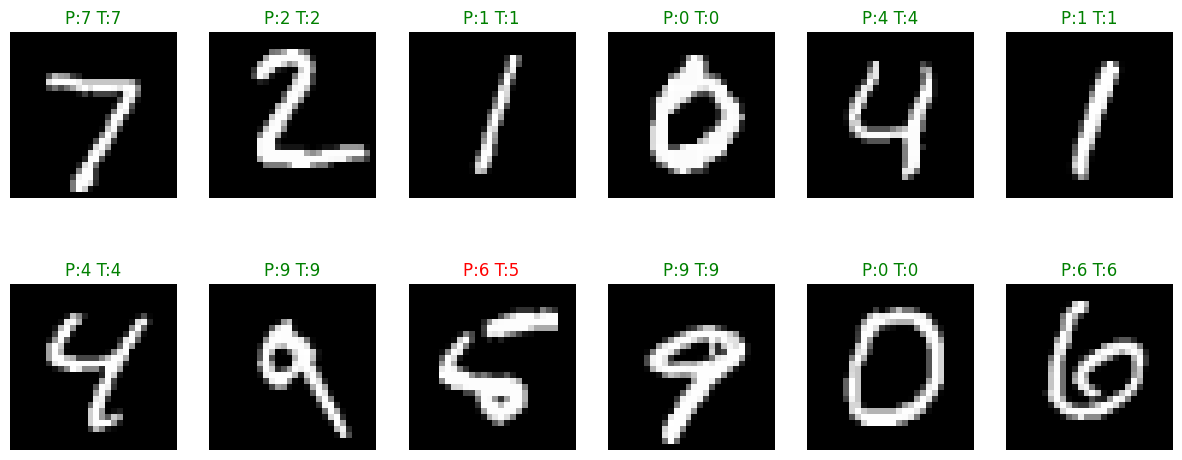

In [22]:
# Get the first batch of raw test images for visualization
example_data = test_dataset_raw.data[:12].numpy()
example_targets = test_dataset_raw.targets[:12].numpy()

example_preds = y_pred_svm_native[:12]

# Plot the examples
plt.figure(figsize=(15, 6))
for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(example_data[i], cmap='gray')
    color = 'green' if example_preds[i] == example_targets[i] else 'red'
    plt.title(f"P:{example_preds[i]} T:{example_targets[i]}", color=color)
    plt.axis('off')
plt.show()